In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# importing machine learning models for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC

In [4]:
pd.options.display.max_columns = 999

In [5]:
# Read data
train_values = pd.read_csv('data/train_values.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test_values = pd.read_csv('data/test_values.csv')

In [6]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [20]:
X = train_values.iloc[0:1000,4:14]
X = pd.get_dummies(X, prefix_sep='_')
#X = StandardScaler().fit_transform(X)

In [7]:
X.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t
0,2,30,6,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,2,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,2,10,5,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,2,10,6,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3,30,8,9,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [9]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

Text(0.5, 1.0, 'hp')

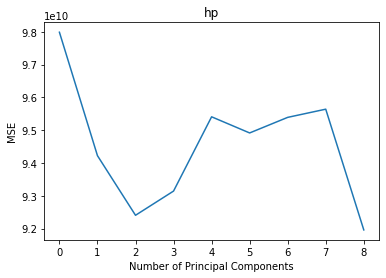

In [21]:
pca = PCA()
principalComponents = pca.fit_transform(scale(X))

#define cross validation
cv = RepeatedKFold(
    n_splits=10, 
    n_repeats=3,
    random_state=1
    )

RF = RandomForestClassifier()
mse = []

#calculate MSE
# score = -1 * model_selection.cross_val_score(
#     RF,
#     np.ones((len(principalComponents),1)), 
#     train_labels.iloc[0:1000,:], 
#     cv=cv,
#     scoring='neg_mean_squared_error'
#     ).mean()  
# mse.append(score)

for i in np.arange(1, 9):
    score = -1 * model_selection.cross_val_score(
        RF,
        principalComponents[:,:i], 
        train_labels.iloc[0:1000,:], 
        cv=cv, 
        scoring='neg_mean_squared_error'
        ).mean()
    mse.append(score)
    
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [22]:
principalComponents.shape

(1000, 28)

In [34]:
PCA_df = pd.DataFrame(data=principalComponents[:,:2], columns=['PC1', 'PC2'])
PCA_df.shape

(1000, 2)

In [45]:
PCA_df.head(n=10)

,PC1,PC2
0,-0.992603,0.842049
1,-0.418072,-0.164274
2,-0.517583,-0.047643
3,-0.769923,-1.032599
4,-0.850404,0.634297
5,-1.146644,-0.162412
6,-0.670275,-1.089713
7,2.725105,-0.979951
8,-0.925813,0.672184
9,4.848776,-2.351783


In [80]:
# Add PCA components to DF
new_train_values = train_values.iloc[0:1000,:]
new_train_values = pd.concat([new_train_values, PCA_df], axis=1)

In [81]:
# Drop columns used for PCA
# columns #4 ~ #14: "count_floors_pre_eq" ~ "plan_configuration"
drop_list = new_train_values.columns[4:15]
new_train_values.drop(drop_list, axis=1, inplace=True)

In [82]:
new_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,PC1,PC2
0,802906,6,487,12198,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.992603,0.842049
1,28830,8,900,2812,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.418072,-0.164274
2,94947,21,363,8973,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.517583,-0.047643
3,590882,22,418,10694,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.769923,-1.032599
4,201944,11,131,1488,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.850404,0.634297


In [79]:
drop_list

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position'],
      dtype='object')

In [372]:
new_train_df = pd.merge(new_train_values, train_labels, on="building_id")

In [373]:
geo1_count = pd.DataFrame(new_train_df['geo_level_1_id'].value_counts().sort_index())
#geo1_count.index.names = ['id']
geo1_count

,geo_level_1_id
0,15
1,11
2,1
3,28
4,56
5,10
6,93
7,71
8,71
9,20


In [374]:
# Create geo_level == 1 Dataframe
temp = []
damage1 = pd.DataFrame()
for i in range(1,4):
    for j in range(0,31):
        geo = len(new_train_df[new_train_df['damage_grade']==i][new_train_df['geo_level_1_id']==j])
        temp.append(geo)
    damage1[i] = pd.DataFrame(temp)
    temp = []

damage1.columns = ['dam1', 'dam2', 'dam3']

/var/folders/gm/kys_b_lx5n153wpkc5l01s280000gn/T/ipykernel_18484/508940278.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  geo = len(new_train_df[new_train_df['damage_grade']==i][new_train_df['geo_level_1_id']==j])


In [375]:
geo2_count = pd.DataFrame(new_train_df['geo_level_2_id'].value_counts().sort_index())
geo2_count.index.names = ['id']
geo2_count

,geo_level_2_id
id,
4,1
5,1
9,4
11,2
14,1
...,...
1416,1
1418,1
1419,1


In [376]:
# Create geo_level == 2 Dataframe
temp = []
damage2 = pd.DataFrame()
for i in range(1,4):
    for j in range(0,1427):
        geo = len(new_train_df[new_train_df['damage_grade']==i][new_train_df['geo_level_2_id']==j])
        temp.append(geo)
    damage2[i] = pd.DataFrame(temp)
    temp = []

damage2.columns = ['dam1', 'dam2', 'dam3']

/var/folders/gm/kys_b_lx5n153wpkc5l01s280000gn/T/ipykernel_18484/4024634579.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  geo = len(new_train_df[new_train_df['damage_grade']==i][new_train_df['geo_level_2_id']==j])


In [377]:
geo3_count = pd.DataFrame(new_train_df['geo_level_3_id'].value_counts().sort_index())
geo3_count.index.names = ['id']
geo3_count

,geo_level_3_id
id,
8,1
17,1
20,1
24,2
50,1
...,...
12476,1
12488,1
12492,1


In [378]:
# Create geo_level == 3 Dataframe
temp = []
damage3 = pd.DataFrame()
for i in range(1,4):
    for j in range(0,12562):
        geo = len(new_train_df[new_train_df['damage_grade']==i][new_train_df['geo_level_3_id']==j])
        temp.append(geo)
    damage3[i] = pd.DataFrame(temp)
    temp = []

damage3.columns = ['dam1', 'dam2', 'dam3']

/var/folders/gm/kys_b_lx5n153wpkc5l01s280000gn/T/ipykernel_18484/4173784647.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  geo = len(new_train_df[new_train_df['damage_grade']==i][new_train_df['geo_level_3_id']==j])


In [379]:
damage1

,dam1,dam2,dam3
0,1,13,1
1,1,7,3
2,1,0,0
3,0,17,11
4,2,42,12
5,1,9,0
6,9,61,23
7,2,49,20
8,2,33,36
9,3,12,5


In [412]:
damage2

,dam1,dam2,dam3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
1422,0,0,0
1423,0,0,0
1424,0,0,0
1425,0,0,0


In [381]:
damage3.tail(n=40)

,dam1,dam2,dam3
12522,0,0,0
12523,0,0,0
12524,0,0,0
12525,0,0,0
12526,0,0,0
12527,0,0,0
12528,0,0,0
12529,0,0,0
12530,0,0,0
12531,0,0,0


In [383]:
new_train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,PC1,PC2,damage_grade
0,802906,6,487,12198,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.992603,0.842049,3
1,28830,8,900,2812,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.418072,-0.164274,2
2,94947,21,363,8973,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.517583,-0.047643,3
3,590882,22,418,10694,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.769923,-1.032599,2
4,201944,11,131,1488,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.850404,0.634297,3


In [384]:
new_train_df['geo_level_1_id'][1]

8

In [385]:
geo1 = new_train_df['geo_level_1_id'][57]
dam1 = new_train_df['damage_grade'][57] - 1
prob = damage1.iloc[geo1,dam1] / geo1_count[geo1_count.index == geo1].iloc[0,0]
geo1, dam1+1, damage1.iloc[geo1,dam1], geo1_count[geo1_count.index == geo1].iloc[0,0], prob

(30, 2, 10, 13, 0.7692307692307693)

In [324]:
# cond_prob11 = []
# cond_prob12 = []
# cond_prob13 = []
# cond_prob21 = []
# cond_prob22 = []
# cond_prob23 = []
# cond_prob31 = []
# cond_prob32 = []
# cond_prob33 = []

# for i in range(len(new_train_df)):
#     geo11 = new_train_df['geo_level_1_id'][i]
#     dam11 = new_train_df['damage_grade'][i] - 1
#     prob11 = damage1.iloc[geo11,dam11] / geo1_count[geo1_count.index == geo11].iloc[0,0]
#     cond_prob11.append(prob11)

#     geo12 = new_train_df['geo_level_1_id'][i]
#     dam12 = new_train_df['damage_grade'][i] - 1
#     prob = damage1.iloc[geo1,dam1] / geo1_count[geo1_count.index == geo1].iloc[0,0]
#     cond_prob11.append(prob)



# new_train_df['geo1_damage1_prob'] = pd.DataFrame(cond_prob11)


In [405]:
# Calculate conditional probability of damage_grade == 1,2,3 based on geo_level_1
cond_prob_geo1 = []

for i in range(len(new_train_df)):
    geo11 = new_train_df['geo_level_1_id'][i]

    temp = []
    for j in range(0,3):     
        dam = j
        prob11 = damage1[damage1.index ==geo11].iloc[0,dam] / geo1_count[geo1_count.index == geo11].iloc[0,0]
        temp.append(prob11)
    
    cond_prob_geo1.append(temp)

geo1_prob_temp_df = pd.DataFrame(cond_prob_geo1)
geo1_prob_temp_df.columns = ['geo1_dam1_prob', 'geo1_dam2_prob', 'geo1_dam3_prob']

new_train_df = pd.concat([new_train_df, geo1_prob_temp_df], axis=1)

In [408]:
new_train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,PC1,PC2,damage_grade,geo1_dam1_prob,geo1_dam2_prob,geo1_dam3_prob,geo2_dam1_prob,geo2_dam2_prob,geo2_dam3_prob,geo1_dam1_prob,geo1_dam2_prob,geo1_dam3_prob,geo2_dam1_prob,geo2_dam2_prob,geo2_dam3_prob
0,802906,6,487,12198,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.992603,0.842049,3,0.096774,0.655914,0.247312,0.0,0.000000,1.000000,0.096774,0.655914,0.247312,0.0,0.000000,1.000000
1,28830,8,900,2812,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.418072,-0.164274,2,0.028169,0.464789,0.507042,0.0,0.666667,0.333333,0.028169,0.464789,0.507042,0.0,0.666667,0.333333
2,94947,21,363,8973,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.517583,-0.047643,3,0.021739,0.304348,0.673913,0.0,0.333333,0.666667,0.021739,0.304348,0.673913,0.0,0.333333,0.666667
3,590882,22,418,10694,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.769923,-1.032599,2,0.181818,0.636364,0.181818,0.0,1.000000,0.000000,0.181818,0.636364,0.181818,0.0,1.000000,0.000000
4,201944,11,131,1488,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.850404,0.634297,3,0.054054,0.621622,0.324324,0.0,0.333333,0.666667,0.054054,0.621622,0.324324,0.0,0.333333,0.666667


In [407]:
# Calculate conditional probability of damage_grade == 1,2,3 based on geo_level_2
cond_prob_geo2 = []

for i in range(len(new_train_df)):
    geo11 = new_train_df['geo_level_2_id'][i]

    temp = []
    for j in range(0,3):     
        dam = j
        prob11 = damage2[damage2.index ==geo11].iloc[0,dam] / geo2_count[geo2_count.index == geo11].iloc[0,0]
        temp.append(prob11)
    
    cond_prob_geo2.append(temp)

geo2_prob_temp_df = pd.DataFrame(cond_prob_geo2)
geo2_prob_temp_df.columns = ['geo2_dam1_prob', 'geo2_dam2_prob', 'geo2_dam3_prob']

new_train_df = pd.concat([new_train_df, geo2_prob_temp_df], axis=1)

In [416]:
# Calculate conditional probability of damage_grade == 1,2,3 based on geo_level_3
# cond_prob_geo3 = []

# for i in range(len(new_train_df)):
#     geo11 = new_train_df['geo_level_3_id'][i]

#     temp = []
#     for j in range(0,3):     
#         dam = j
#         prob11 = damage3[damage3.index ==geo11].iloc[0,dam] / geo3_count[geo3_count.index == geo11].iloc[0,0]
#         temp.append(prob11)
    
#     cond_prob_geo3.append(temp)

# geo3_prob_temp_df = pd.DataFrame(cond_prob_geo3)
# geo3_prob_temp_df.columns = ['geo3_dam1_prob', 'geo3_dam2_prob', 'geo3_dam3_prob']

# new_train_df = pd.concat([new_train_df, geo3_prob_temp_df], axis=1)

In [418]:
damage3

,dam1,dam2,dam3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
12557,0,0,0
12558,0,0,0
12559,0,0,0
12560,0,0,0


In [417]:
new_train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,PC1,PC2,damage_grade,geo1_dam1_prob,geo1_dam2_prob,geo1_dam3_prob,geo2_dam1_prob,geo2_dam2_prob,geo2_dam3_prob,geo1_dam1_prob,geo1_dam2_prob,geo1_dam3_prob,geo2_dam1_prob,geo2_dam2_prob,geo2_dam3_prob,geo3_dam1_prob,geo3_dam2_prob,geo3_dam3_prob
0,802906,6,487,12198,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.992603,0.842049,3,0.096774,0.655914,0.247312,0.0,0.000000,1.000000,0.096774,0.655914,0.247312,0.0,0.000000,1.000000,0.0,0.0,1.0
1,28830,8,900,2812,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.418072,-0.164274,2,0.028169,0.464789,0.507042,0.0,0.666667,0.333333,0.028169,0.464789,0.507042,0.0,0.666667,0.333333,0.0,1.0,0.0
2,94947,21,363,8973,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.517583,-0.047643,3,0.021739,0.304348,0.673913,0.0,0.333333,0.666667,0.021739,0.304348,0.673913,0.0,0.333333,0.666667,0.0,0.0,1.0
3,590882,22,418,10694,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.769923,-1.032599,2,0.181818,0.636364,0.181818,0.0,1.000000,0.000000,0.181818,0.636364,0.181818,0.0,1.000000,0.000000,0.0,1.0,0.0
4,201944,11,131,1488,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.850404,0.634297,3,0.054054,0.621622,0.324324,0.0,0.333333,0.666667,0.054054,0.621622,0.324324,0.0,0.333333,0.666667,0.0,0.0,1.0


<h4 style="color: blue"> We don't run conditional probability on geo_3_level, scope too narrow.</h4>

In [421]:
train_values[train_values['geo_level_3_id']==8973]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1055,975963,21,363,8973,3,20,13,8,n,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1935,997384,21,363,8973,2,40,3,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2345,403957,21,363,8973,3,30,13,8,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2925,449900,21,363,8973,2,10,5,4,t,r,n,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247478,797822,21,363,8973,1,5,2,3,t,u,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,0,1,0,1,0,0,0,0,0,0,0,0
248364,987458,21,363,8973,3,20,7,7,t,r,x,v,s,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
252480,637124,21,363,8973,3,10,8,8,t,r,x,v,s,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
252905,478683,21,363,8973,3,20,6,7,t,r,n,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
